In [2]:
push!(LOAD_PATH,pwd())

SyntaxError: invalid syntax (<ipython-input-2-2e34953d2244>, line 1)

In [4]:
using MAT
using KinectSkeletonV1
using KinectVisualizeV1

In [85]:
#M = matread("vae2_samples_269688832.mat")
#M = matread("vae3-nz40_samples_917929984.mat")
M = matread("vae3-nz40_pathes.mat")

XS = M["X_1"]
#XS = M["X"]
size(XS)

(100,60)

In [80]:
using PyPlot

In [56]:
ion()

In [54]:
ioff()

In [ ]:
for j = 1:20
XS = M["X_$j"]
for i=1:size(XS,1)
    fig, axes = visualize_skeleton(vec(XS[i,:]); fsize=6)
    fig[:savefig]("vae3-nz40_sample_$(i).png", dpi=200)
end
run(`ffmpeg -f image2 -i vae3-nz40_sample_%d.png vae3-nz40_path_$(j).gif`)
end
nothing

## Model Samples

In [1]:
for i=4:10
    visualize_skeleton(vec(XS[i,:]); fsize=5);
end

SyntaxError: invalid syntax (<ipython-input-1-a698b79937c9>, line 1)

## Real Samples

In [ ]:
for i=1:3
    visualize_skeleton(vec(Y[i,:]); fsize=5);
end

In [13]:
m12 = matread("..\\data\\MicrosoftGestureDataset-RC\\MSRC12.mat");

In [14]:
keys(m12)

Base.KeyIterator for a Dict{ASCIIString,Any} with 2 entries. Keys:
  "MSRC12"
  "MSRC12_tags"

In [15]:
X = m12["MSRC12"][2][1];
size(X)

(1076,80)

# Visualize a sequence

In [16]:
n = length(m12["MSRC12"]);
@time YS = [eighty2sixty(filter_cont(m12["MSRC12"][i][1]))' for i=1:n]; # all observations
total_frames = sum(map(Yseq -> size(Yseq,2), YS))

  1.978967 seconds (2.52 M allocations: 1.575 GB, 16.57% gc time)


702551

In [18]:
Y = vcat(map(y -> y', YS));
Y = vcat(Y...)
Y = Y[randperm(size(Y,1)),:]
size(Y)

(702551,60)

In [22]:
?matwrite

search: matwrite



No documentation found.

`MAT.matwrite` is a generic `Function`.

```julia
# 1 method for generic function "matwrite":
matwrite{S,T}(filename::AbstractString, dict::Dict{S,T}) at C:\Users\senowozi\.julia\v0.4\MAT\src\MAT.jl:124
```


In [21]:
matwrite("..\\data\\MSRC12-X-d60.mat", {"X" => Y})

In [27]:
visualize_skelseq(YS[1]')

Rendering...100%|########################################| Time: 0:07:23


Frames{MIME{symbol("image/png")}}("C:\\Users\\senowozi\\AppData\\Local\\Temp\\jul2766.tmp",0x0000000000000599,30.0,nothing)

In [6]:
size(YS)

(594,)

In [7]:
include("test_KinectSmoother.jl")

map_estimate! (generic function with 2 methods)

In [8]:
obsmod = SkelObsModel(MvNormal(zeros(60), ((0.3)^2)*eye(60)))

sigma_cur = 0.01
sigma_prev = 0.005
sigma_prior = 0.25
noisecur = MvNormal(zeros(60), (sigma_cur^2)*eye(60))
noiseprev = MvNormal(zeros(60), (sigma_prev^2)*eye(60))
prior = MvNormal(mean(YS[1],2)[:], (sigma_prior^2)*eye(60))

transmod = SkelTransModel(noisecur, noiseprev, prior)

ssm = StateSpaceModel(transmod, obsmod)
Xseq, Yseq = simulate(ssm, 100);

In [25]:
X = zeros(60, length(Xseq))
for i=1:length(Xseq)
    X[:,i] = Xseq[i].skel
end
nothing

In [26]:
visualize_skelseq(X')

Rendering...100%|########################################| Time: 0:00:31


Frames{MIME{symbol("image/png")}}("C:\\Users\\senowozi\\AppData\\Local\\Temp\\jul4D48.tmp",0x0000000000000064,30.0,nothing)

In [10]:
Yseq = [SkelObs(YS[1][:,i]) for i=1:size(YS[1],2)];

In [11]:
Yseq = Yseq[1:100];
size(Yseq)

(100,)

In [12]:
@time FP, FlogW = filter_sir(ssm, Yseq, 512);

elapsed time: 4.111623001 seconds (371632544 bytes allocated)


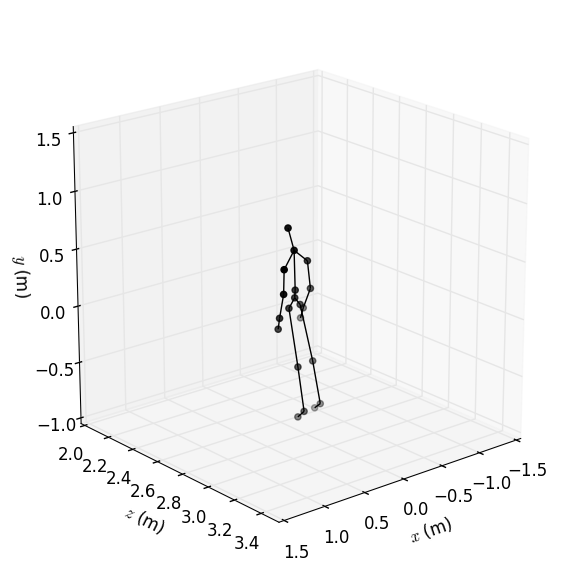

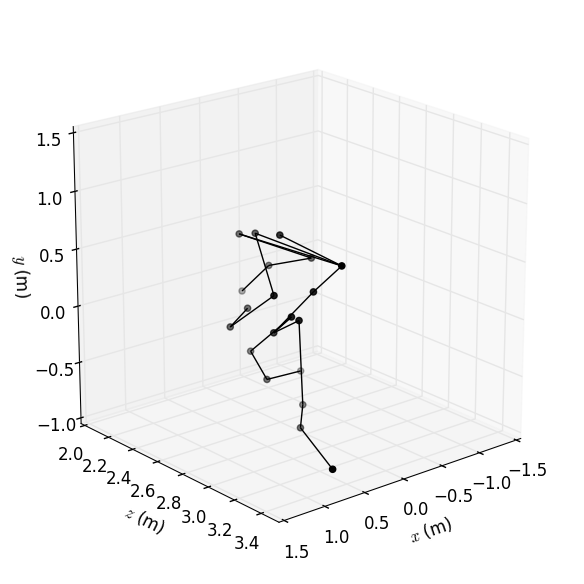

In [20]:
visualize_skeleton(Yseq[2].skel);
visualize_skeleton(FP[4,2].skel);

In [ ]:
typeof(FP[4,50])

In [13]:
typeof(FP)

Array{SkelState,2}

In [17]:
FP[4,50].skel

60-element Array{Float64,1}:
 -0.175435 
  0.311155 
  3.39475  
  0.817746 
  0.401881 
  2.52203  
 -0.438521 
  2.08052  
  1.32753  
  0.797019 
  0.399757 
  3.38627  
  0.0871764
  ⋮        
  0.329021 
 -0.989191 
  2.66922  
  1.00552  
 -0.0407833
  3.10942  
  0.338755 
 -1.24379  
  2.77732  
 -0.393634 
 -0.403932 
  3.28364  

In [ ]:
size(FlogW)

In [ ]:
minimum([SSM.compute_ess(FlogW[:,i]) for i=1:size(FlogW,2)])

In [ ]:
FP